Шаг 1. Установите библиотеку через pip

# Установка sklearn выполняется одной командой через консоль:

In [14]:
!pip install scikit-learn

Библиотека scikit-learn поддерживает Python 3.7–3.12. Если версия ниже, она может не установиться или не запуститься. Проверить версию можно так:

In [15]:
!python --version

Python 3.11.9


# Как устроена библиотека scikit-learn и с чего начать работу

У sklearn единый подход ко всем моделям: сначала данные передают в fit, потом получают предсказания через predict, а дальше оценивают результат — с помощью score или функций из metrics. Эта схема работает одинаково для разных алгоритмов, поэтому после первого примера становится понятно, как работает вся библиотека.

На старте обычно подключают четыре модуля:

- datasets — встроенные датасеты для тестов;

- linear_model — простые модели вроде логистической регрессии;

- model_selection — разбиение данных и кросс-валидация;

- metrics — функции для оценки качества.

In [16]:
from sklearn import datasets


data = datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
from sklearn import datasets, linear_model, metrics, model_selection

# Загружаем данные, и разбиваем сразу на значения для обучения и конечные данные обучения
X,y = datasets.load_iris(return_X_y=True)

# Разбиваем на обучение и тест
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем модель
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Получаем предсдсказания
y_pred = model.predict(X_test)

# Считаем метрику
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Мы разобрали минимальный рабочий пример, как устроена задача машинного обучения: есть данные, есть модель, есть оценка. Всё остальное: отбор признаков, обработка, выбор алгоритма — добавляется к этой базовой схеме.

# Подготовка данных к обучению

Scikit-learn принимает числовые и категориальные данные, но требует предварительной подготовки. Обычно в таблицах бывают пропуски, текстовые значения и признаки с разными шкалами — их нужно обработать заранее.

В новых версиях scikit-learn некоторые модели, например HistGradientBoostingClassifier, умеют работать с пропусками, тем не менее в большинстве случаев NaN нужно обрабатывать отдельно — до запуска обучения.

In [18]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.drop(["Cabin", "Ticket", "Cabin", "Name", "PassengerId"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df.drop(["Survived"], axis=1), df['Survived'], test_size=0.3, random_state=42
)
display(X_train)
display(y_train)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,male,4.0,0,2,81.8583,S
650,3,male,NaN,0,0,7.8958,S
172,3,female,1.0,1,1,11.1333,S
450,2,male,36.0,1,2,27.7500,S
314,2,male,43.0,1,1,26.2500,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

# Кодируем категориальные признаки
Модели scikit-learn работают только с числами. Если в таблице есть текст — например, "красный", "синий", "зелёный" в колонке "цвет", — его нужно превратить в числовые значения. Иначе fit() просто не запустится.

Для этого используют OneHotEncoder. Он создаёт отдельный признак для каждого уникального значения. Вместо одной колонки "цвет" получится несколько: "цвет_красный", "цвет_синий", "цвет_зелёный" и т. д.

По умолчанию OneHotEncoder возвращает разреженную матрицу — в ней не хранятся нули. Чтобы получить обычный numpy-массив, указывают sparse_output=False.

Пример запроса:

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[["Sex"]])
X_train_encoded = encoder.transform(X_train[["Sex"]])
X_test_encoded = encoder.transform(X_test[["Sex"]])

X_train_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], shape=(623, 2))

Параметр handle_unknown="ignore" нужен, чтобы не получить ошибку, если в тесте появится значение, которого не было в обучении.

Если категорий много или они упорядочены по смыслу, можно использовать OrdinalEncoder. Но для начала чаще выбирают one-hot. Он проще: не нужно задавать порядок категорий — и безопаснее: модель не подхватит лишние зависимости между значениями, как это бывает с OrdinalEncoder.

# Обрабатываем пропуски

Scikit-learn не работает с NaN. Если в данных остались пропуски, fit() просто не запустится. Их нужно убрать до обучения — для этого используют SimpleImputer.

- Пропуски можно заполнить разными способами:

- средним значением по колонке (mean);

- медианой (median);

фиксированным значением (constant), например 0 или "missing".

Сначала создаём объект с нужным способом заполнения: mean, median или constant. Потом вызываем fit() на обучающей выборке — он считает, чем заменять. Дальше применяем transform() отдельно к train и test. Это важно, чтобы не утекла информация с теста в обучение.

In [22]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="mean")
# imputer.fit(X_train)
# X_train_filled = imputer.transform(X_train)
# X_train_filled = imputer.transform(X_test)

# X_train_filled

# Приводим числовые признаки к одной шкале

Некоторые модели чувствительны к диапазону значений — например, те, что используют расстояния между объектами (как k-ближайших соседей) или градиенты (линейные модели, нейросети). Если один признак меняется от 0 до 1, а другой — от 0 до 10 000, вес второго окажется сильно завышен.

Чтобы этого избежать, признаки приводят к одной шкале. В scikit-learn для этого есть два основных инструмента:

StandardScaler — вычитает среднее и делит на стандартное отклонение;

MinMaxScaler — приводит значения к диапазону от 0 до 1.

Масштабирование делают так же, как и заполнение пропусков: fit() — на X_train, transform() — на обе выборки.

In [23]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Назначаем трансформеры по группам признаков
Числовые и категориальные данные обрабатываются по-разному. One-hot не применим к числам, а масштабирование — к строкам. Поэтому каждому типу назначают свой трансформер — объект, который меняет значения, например нормализует или кодирует.

В scikit-learn для этого есть ColumnTransformer. Он задаёт, какие преобразования к каким столбцам применять, и собирает всё в одну структуру. Например, "age" и "income" масштабируются, "city" — кодируется.

Важно: строковые признаки должны быть приведены к типу category — иначе make_column_selector с dtype_include="category" их не увидит. По умолчанию они обычно имеют тип object.

Пример кода:

In [24]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ("Sex", OneHotEncoder(), make_column_selector(dtype_include="Sex")),
    ("Embarked", OneHotEncoder(), make_column_selector(dtype_include="Embarked")),
    ("Age", SimpleImputer(strategy="mean"), make_column_selector(dtype_include="Age")),
])

Теперь fit() и transform() можно вызывать сразу на всей таблице: каждая колонка пройдёт свою обработку.

Автоматический выбор колонок работает по типам: числовые, категориальные. Обычно этого хватает, но если типы данных определились неправильно, нужные признаки могут не попасть в обработку. В таких случаях колонки лучше задать через feature_names_in_ и feature_types_in_. Оба варианта упрощают построение пайплайна: не нужно вручную фильтровать признаки под каждый трансформер.

# Собираем обработку и модель в один пайплайн
Если подготовка включает несколько шагов: заполнение пропусков, масштабирование, кодирование, — её удобнее оформить как цепочку через Pipeline. Это убирает лишние вызовы fit() и transform(), упрощает код и избавляет от повторов в функциональной логике.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train)

TypeError: data type 'Sex' not understood

теперь достаточно вызвать fit() один раз — scikit-learn сам применит все шаги в нужном порядке: сначала обработку, потом обучение. Каждый шаг (step) — это отдельный трансформер или модель внутри пайплайна.

На predict() сработает та же цепочка, но без повторного fit().

Важно: fit() вызывается только на обучающей выборке — он считает параметры, например среднее для масштабирования. transform() применяет эти параметры к train и test. Если случайно вызвать fit() на тесте, модель увидит данные, которых не должно быть, и итоговая метрика будет некорректной. Pipeline делает всё автоматически и защищает от таких ошибок.

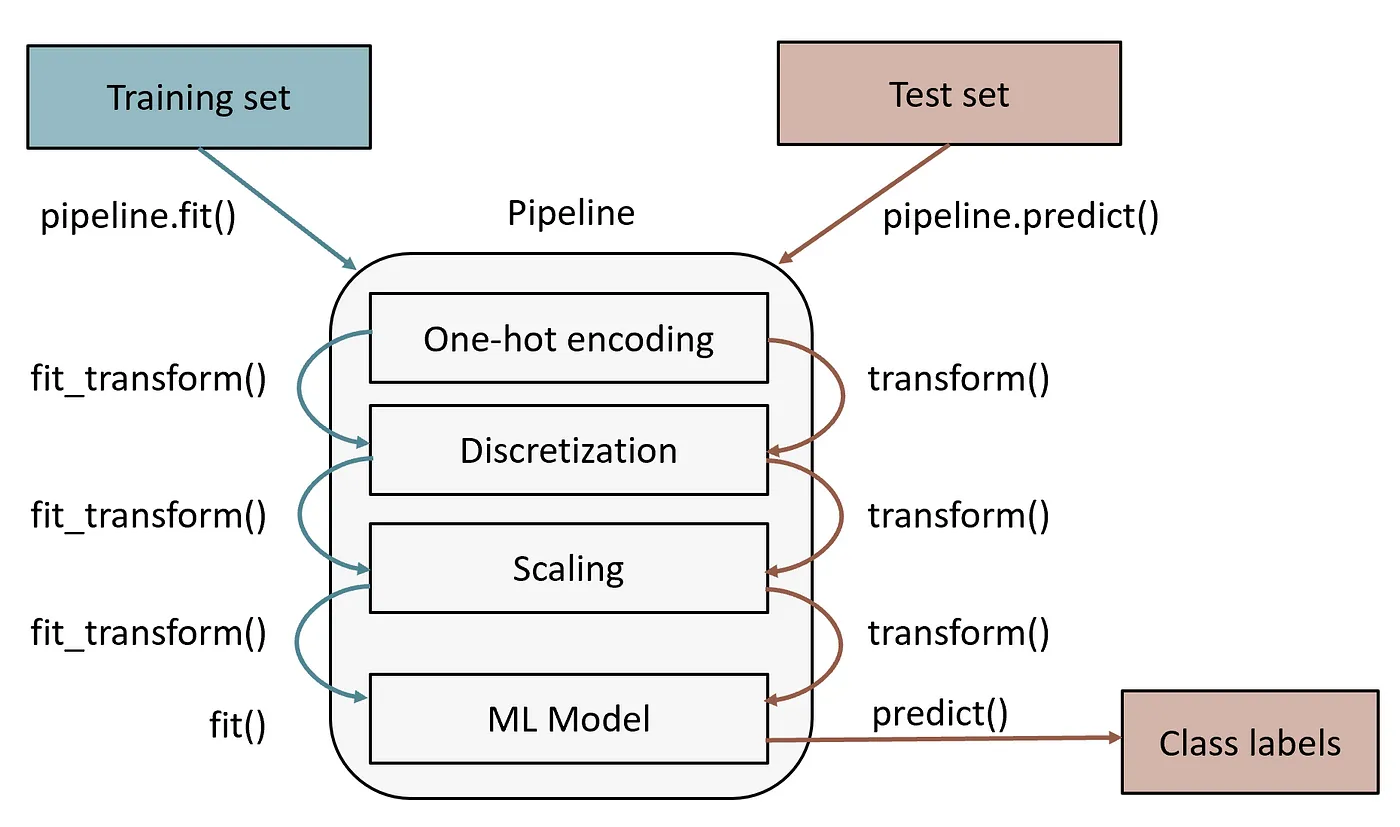

# Классификация и регрессия

Когда данные подготовлены и пайплайн собран, можно переходить к обучению моделей. Как мы уже разбирали, в scikit-learn у всех алгоритмов общий интерфейс: fit() обучает, predict() делает предсказания, score() оценивает результат.

Классификация и регрессия работают по одной схеме и различаются только типом целевой переменной: в первом случае это класс, во втором — число.


Выбираем модель под задачу
Среди классификаторов sklearn чаще всего используют:

- LogisticRegression — подойдёт, если данные простые и хочется понять, как работает модель;

- RandomForestClassifier — хорошо справляется с шумом и разными типами признаков;

- GradientBoostingClassifier — даёт точные результаты, если задача сложная и данных достаточно для обучения.

Из регрессионных моделей:

- LinearRegression — если признаки числовые и зависимость от целевой переменной простая;

- RandomForestRegressor — устойчив к шуму и выбросам, подходит для разнородных данных;

- GradientBoostingRegressor — для задач, где важна точность и результат оценивают по метрикам ошибки.

*Если задача новая, обычно сравнивают простую и более сложную модель с настройками по умолчанию. Если качество заметно отличается, сначала можно попробовать доработать простую модель, а при необходимости — перейти к более сложной. Иногда разница бывает настолько большой, что имеет смысл сразу выбрать более сложный алгоритм.*

# Обучаем модель на данных

In [ ]:
model.fit(X_train, y_train)


In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Для проверки можно использовать встроенные датасеты — например, load_iris() для классификации или load_diabetes() для регрессии. Это простой способ убедиться, что пайплайн собран правильно и всё запускается без ошибок.

# Оцениваем качество модели
После обучения нужно понять, как модель справляется с задачей. У большинства моделей в scikit-learn есть метод score(), который по умолчанию возвращает одну базовую метрику:

для классификации — accuracy (доля правильных ответов);

для регрессии — R² (насколько модель объясняет разброс в данных).

Для быстрой проверки этого достаточно, но чаще используют более точные метрики — когда классы несбалансированны или важно понять, насколько сильно результат отклоняется от правильного значения.

Для классификации:

- accuracy_score — это та же метрика, которую по умолчанию возвращает score(), но её часто вызывают отдельно, чтобы сравнить несколько моделей или сохранить результат в общей таблице. Подходит, если классы в выборке распределены равномерно. Если один класс встречается намного чаще, модель может показывать высокую accuracy, даже если просто всегда выбирает этот класс и пропускает остальные.

- f1_score — полезен, когда важно учитывать оба типа ошибок: и ложные срабатывания, и пропущенные случаи. Это усреднённый показатель между precision (точность) и recall (полнота). Его используют, если данные несбалансированны или нужно ловить редкие случаи.

- roc_auc_score — показывает, насколько хорошо модель различает классы по предсказанным вероятностям. Часто используется в бинарной классификации. В многоклассовых задачах его тоже применяют — через подход one-vs-rest.

Для регрессии:

- r2_score — та же метрика, которую по умолчанию возвращает score() у регрессионных моделей. Её часто вызывают явно — чтобы сравнить с другими метриками, сохранить результат или посчитать на кросс-валидации. Показывает, насколько хорошо модель объясняет разброс в целевой переменной. Может принимать значения от 1 (идеально) до отрицательных (хуже, чем просто усреднение).

- mean_absolute_error (MAE) — показывает, насколько в среднем предсказания отклоняются от фактических значений. Все ошибки учитываются одинаково, независимо от их величины.

- mean_squared_error (MSE) — тоже измеряет отклонения, но в квадрате. За счёт этого большие ошибки влияют на результат сильнее. Если важно учитывать именно большие отклонения — лучше смотреть на MSE.

Все метрики у нас вызываются из sklearn.metrics

In [1]:
# Пример

from sklearn import metrics

# Метрики классификации
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Метрики регрессии
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

# Финальный набор для стартовой задачи
Первая рабочая задача в sklearn всегда строится из одних и тех же компонентов: данные, обработка, модель и метрика. Всё это можно собрать в один эксперимент. Он показывает, как устроена задача, помогает проверить устойчивость модели и даёт основу для следующего шага: настройки, сравнения или выхода в прод.

Вот пример: классификация с логистической регрессией и бустингом на одних и тех же данных. Обработка задаётся один раз, модели переключаются в цикле, результат оценивается по accuracy и f1.

In [2]:
from sklearn import datasets, model_selection, preprocessing, pipeline, linear_model, ensemble, metrics

# Данные
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

# Обработка
scaler = preprocessing.StandardScaler()

# Модели
models = {
    "LogisticRegression": linear_model.LogisticRegression(max_iter=1000),
    "GradientBoosting": ensemble.GradientBoostingClassifier()
}

# Запускаем цикл
for name, model in models.items():
    clf = pipeline.make_pipeline(scaler, model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    print(f"{name}: accuracy = {acc:.2f}, f1 = {f1:.2f}")

LogisticRegression: accuracy = 1.00, f1 = 1.00
GradientBoosting: accuracy = 1.00, f1 = 1.00


# Кросс-валидация и подбор параметров
После первого эксперимента обычно переходят к оценке и настройке модели. Нужно понять, насколько стабильный результат она даёт и можно ли его улучшить.

Сначала проверяют, как модель ведёт себя на разных разбиениях данных. Для этого используют кросс-валидацию. Она помогает понять, будет ли модель хорошо работать на новых данных, а не только на одной удачно выбранной выборке.

Параллельно начинают подбирать параметры: пробуют разные значения и смотрят, как они влияют на метрику. Если параметров немного, это можно сделать вручную. Когда вариантов становится больше, удобнее запускать автоматический перебор.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Проверяем точность модели на 5 фолдах
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print(scores)
print(f"Средняя точность: {scores.mean():.2f}")

StratifiedKFold